In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import STL
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy



In [156]:

os.chdir('/Users/liuhailun/Desktop/TS_Forecasting_Project-main/Data/Input/New_Construction')

data = pd.read_csv('Metro_invt_fs_uc_sfrcondo_sm_month.csv')

In [158]:
np.set_printoptions(precision=10, suppress=True)

In [160]:
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
0,102001,0,United States,country,NaN,1421528.0,1500193.0,1592413.0,1660613.0,1709142.0,...,907228.0,930911.0,950311.0,959735.0,977241.0,970238.0,932240.0,890491.0,876353.0,913266.0
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,46198.0,45506.0,43956.0,42515.0,42586.0,42068.0,39540.0,36461.0,34858.0,36219.0
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,15378.0,15689.0,15969.0,16032.0,16167.0,15877.0,14897.0,14058.0,13754.0,14558.0
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48985.0,...,22706.0,23228.0,23568.0,23569.0,23707.0,22957.0,21135.0,19092.0,18342.0,19049.0
4,394514,4,"Dallas, TX",msa,TX,24043.0,25876.0,28225.0,30490.0,32408.0,...,21744.0,22748.0,23251.0,23342.0,23489.0,23305.0,22577.0,21664.0,21401.0,22517.0


In [162]:
# Convert the 6th to the last columns of the first row to numeric (Python uses 0-based indexing)
NYU = pd.DataFrame()
NYU['price_NYU'] = pd.to_numeric(data.iloc[1, 5:], errors='coerce')
NYU.reset_index(inplace=True)
NYU.rename(columns={'index': 'Date'}, inplace=True)

LA = pd.DataFrame()
LA['price_LA'] = pd.to_numeric(data.iloc[2, 5:], errors='coerce')
LA.reset_index(inplace=True)
LA.rename(columns={'index': 'Date'}, inplace=True)

Chicago = pd.DataFrame()
Chicago['price_Chicago'] = pd.to_numeric(data.iloc[3, 5:], errors='coerce')
Chicago.reset_index(inplace=True)
Chicago.rename(columns={'index': 'Date'}, inplace=True)

Dallas = pd.DataFrame()
Dallas['price_Dallas'] = pd.to_numeric(data.iloc[4, 5:], errors='coerce')
Dallas.reset_index(inplace=True)
Dallas.rename(columns={'index': 'Date'}, inplace=True)

Houston = pd.DataFrame()
Houston['price_Houston'] = pd.to_numeric(data.iloc[5, 5:], errors='coerce')
Houston.reset_index(inplace=True)
Houston.rename(columns={'index': 'Date'}, inplace=True)

WS = pd.DataFrame()
WS['price_WS'] = pd.to_numeric(data.iloc[6, 5:], errors='coerce')
WS.reset_index(inplace=True)
WS.rename(columns={'index': 'Date'}, inplace=True)


Philadelphia = pd.DataFrame()
Philadelphia['price_Philadelphia'] = pd.to_numeric(data.iloc[7, 5:], errors='coerce')
Philadelphia.reset_index(inplace=True)
Philadelphia.rename(columns={'index': 'Date'}, inplace=True)

Miami = pd.DataFrame()
Miami['price_Miami'] = pd.to_numeric(data.iloc[8, 5:], errors='coerce')
Miami.reset_index(inplace=True)
Miami.rename(columns={'index': 'Date'}, inplace=True)

Atlanta = pd.DataFrame()
Atlanta['price_Atlanta'] = pd.to_numeric(data.iloc[9, 5:], errors='coerce')
Atlanta.reset_index(inplace=True)
Atlanta.rename(columns={'index': 'Date'}, inplace=True)

Boston = pd.DataFrame()
Boston['price_Boston'] = pd.to_numeric(data.iloc[10, 5:], errors='coerce')
Boston.reset_index(inplace=True)
Boston.rename(columns={'index': 'Date'}, inplace=True)

In [164]:
NYU.head()

,Date,price_NYU
0,2018-03-31,73707.0
1,2018-04-30,80345.0
2,2018-05-31,85864.0
3,2018-06-30,90067.0
4,2018-07-31,91881.0


In [166]:
combined_df = pd.merge(NYU, LA, on='Date', how='outer')
combined_df = pd.merge(combined_df, Chicago, on='Date', how='outer')
combined_df = pd.merge(combined_df, Dallas, on='Date', how='outer')
combined_df = pd.merge(combined_df, Houston, on='Date', how='outer')
combined_df = pd.merge(combined_df,WS, on='Date', how='outer')
combined_df = pd.merge(combined_df, Philadelphia, on='Date', how='outer')
combined_df = pd.merge(combined_df, Miami, on='Date', how='outer')
combined_df = pd.merge(combined_df, Atlanta, on='Date', how='outer')
df = pd.merge(combined_df, Boston, on='Date', how='outer')

In [168]:
df.head()

,Date,price_NYU,price_LA,price_Chicago,price_Dallas,price_Houston,price_WS,price_Philadelphia,price_Miami,price_Atlanta,price_Boston
0,2018-03-31,73707.0,21998.0,38581.0,24043.0,25618.0,20262.0,24797.0,55444.0,25097.0,9067.0
1,2018-04-30,80345.0,23784.0,42253.0,25876.0,27360.0,23466.0,26773.0,55297.0,26357.0,10677.0
2,2018-05-31,85864.0,25605.0,45757.0,28225.0,29634.0,26180.0,28663.0,54693.0,27888.0,12850.0
3,2018-06-30,90067.0,27109.0,47492.0,30490.0,31129.0,26325.0,29743.0,52925.0,29198.0,14638.0
4,2018-07-31,91881.0,28811.0,48985.0,32408.0,32397.0,25145.0,29468.0,51462.0,30516.0,15497.0


In [170]:
df['Date'] = pd.to_datetime(df['Date'])

In [172]:
df.tail()

,Date,price_NYU,price_LA,price_Chicago,price_Dallas,price_Houston,price_WS,price_Philadelphia,price_Miami,price_Atlanta,price_Boston
68,2023-11-30,42068.0,15877.0,22957.0,23305.0,23060.0,10812.0,13056.0,33880.0,20734.0,7943.0
69,2023-12-31,39540.0,14897.0,21135.0,22577.0,22368.0,9723.0,12210.0,35467.0,20107.0,6995.0
70,2024-01-31,36461.0,14058.0,19092.0,21664.0,21802.0,8551.0,11158.0,37732.0,19491.0,5976.0
71,2024-02-29,34858.0,13754.0,18342.0,21401.0,21817.0,8048.0,10631.0,40535.0,19548.0,5499.0
72,2024-03-31,36219.0,14558.0,19049.0,22517.0,22897.0,8725.0,11064.0,43370.0,20721.0,5999.0


In [174]:
print(df.describe())

                                Date     price_NYU      price_LA  \
count                             73     73.000000     73.000000   
mean   2021-03-31 03:56:42.739726080  66971.657534  21732.315068   
min              2018-03-31 00:00:00  34858.000000  13376.000000   
25%              2019-09-30 00:00:00  50768.000000  16307.000000   
50%              2021-03-31 00:00:00  69101.000000  21255.000000   
75%              2022-09-30 00:00:00  80976.000000  25605.000000   
max              2024-03-31 00:00:00  97260.000000  31524.000000   
std                              NaN  17644.541484   5336.324757   

       price_Chicago  price_Dallas  price_Houston      price_WS  \
count      73.000000     73.000000      73.000000     73.000000   
mean    35102.657534  24791.986301   24944.739726  16262.534247   
min     18342.000000  14911.000000   16386.000000   8048.000000   
25%     25580.000000  20485.000000   21590.000000  11767.000000   
50%     36754.000000  23342.000000   23449.000000  1

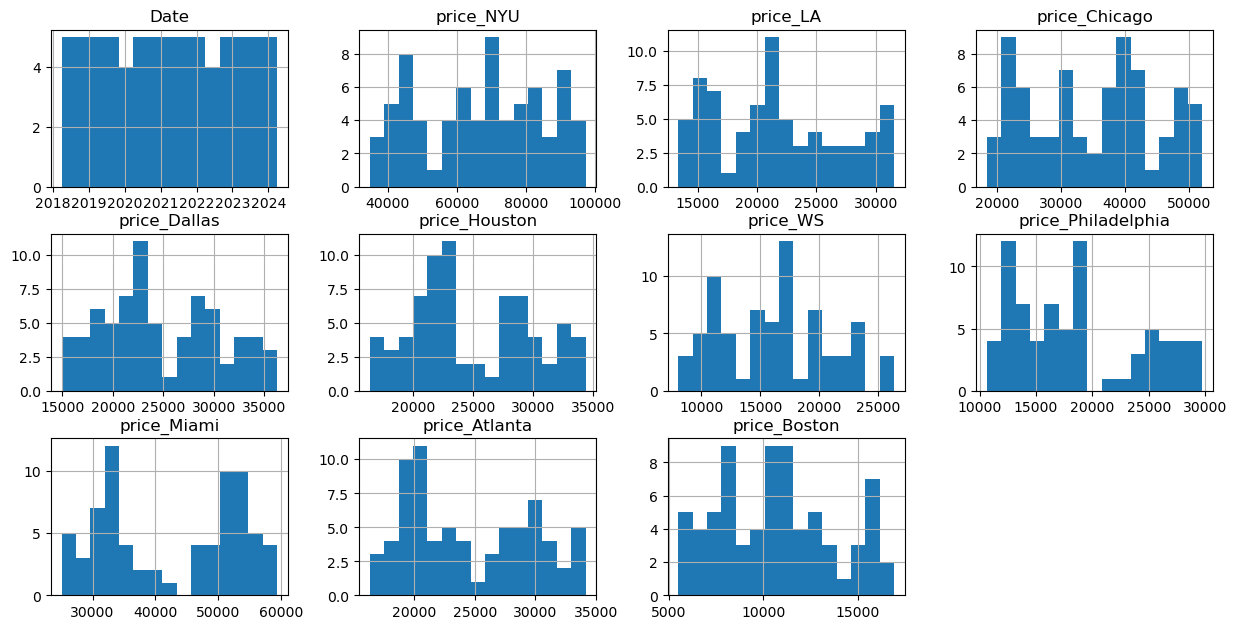

In [176]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

In [177]:
df.isnull().sum()

Date                  0
price_NYU             0
price_LA              0
price_Chicago         0
price_Dallas          0
price_Houston         0
price_WS              0
price_Philadelphia    0
price_Miami           0
price_Atlanta         0
price_Boston          0
dtype: int64

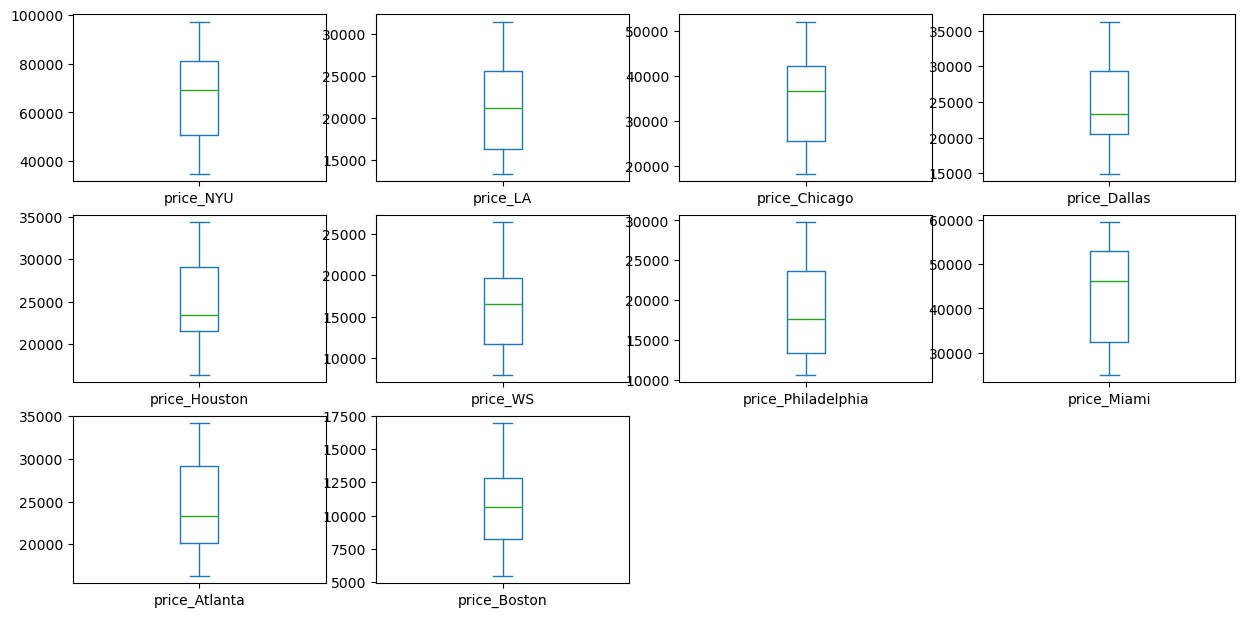

In [180]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()

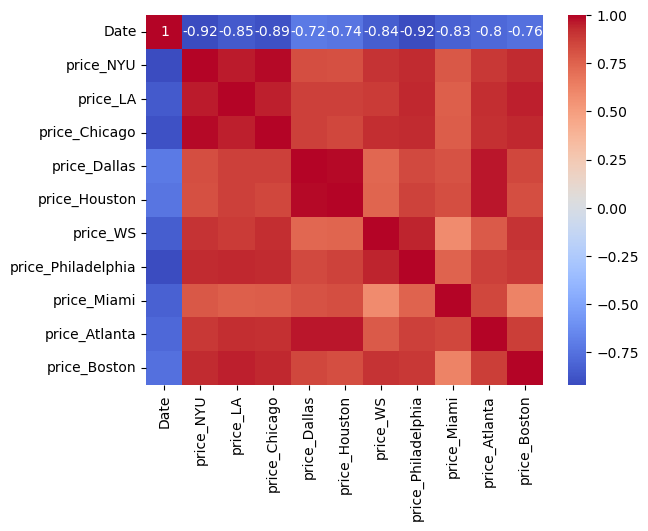

In [182]:
correlation_matrix =df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: >

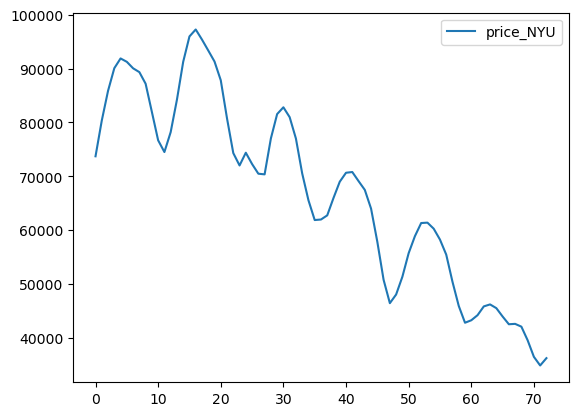

In [184]:
NYU = pd.DataFrame()
NYU['price_NYU'] = pd.to_numeric(data.iloc[1, 5:], errors='coerce')
NYU.reset_index(inplace=True)
NYU.rename(columns={'index': 'Date'}, inplace=True)

NYU.plot()

In [186]:
NYU.head()

,Date,price_NYU
0,2018-03-31,73707.0
1,2018-04-30,80345.0
2,2018-05-31,85864.0
3,2018-06-30,90067.0
4,2018-07-31,91881.0


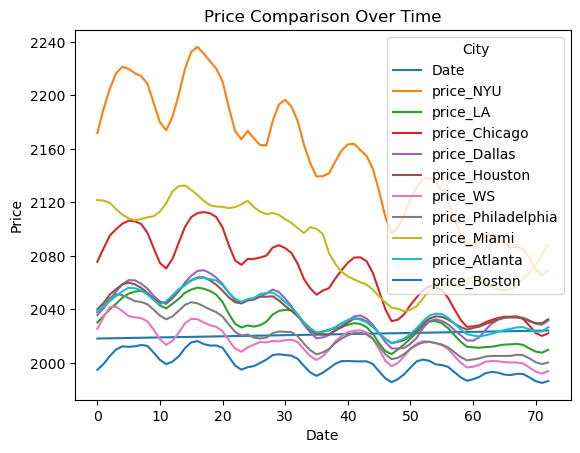

In [188]:
df.plot()  # This plots all columns in the DataFrame

plt.title('Price Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='City')
plt.show()

In [190]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [192]:
adf_test(df['price_NYU'])
alpha = 0.05

Results of Dickey-Fuller Test:
Test Statistic                  0.568322
p-value                         0.986808
#Lags Used                     11.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [194]:
ad_fuller_results = adfuller(df['price_NYU'])
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

stationarity from ad_fuller test: False


In [196]:
#define KPSS
def kpss_test(timeseries, trend='c'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [198]:
kpss_test(df['price_NYU'])

Results of KPSS Test:
Test Statistic           1.209571
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [200]:
kpss_test(df['price_NYU'], trend='ct')

Results of KPSS Test:
Test Statistic           0.101951
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64


In [202]:
kpss_test_results = kpss(df['price_NYU'])
kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

stationarity from KPSS test: False


For Classical Decomposition, Use Seasonal Decompose

In [205]:
NYU.head()

,Date,price_NYU
0,2018-03-31,73707.0
1,2018-04-30,80345.0
2,2018-05-31,85864.0
3,2018-06-30,90067.0
4,2018-07-31,91881.0


In [207]:
NYU = pd.DataFrame()
NYU['price_NYU'] = pd.to_numeric(data.iloc[1, 5:], errors='coerce')
NYU.reset_index(inplace=True)
NYU.rename(columns={'index': 'Date'}, inplace=True)

In [209]:
NYU.iloc[:, 0] = pd.to_datetime(NYU['Date'])


In [211]:
NYU.head()

,Date,price_NYU
0,2018-03-31 00:00:00,73707.0
1,2018-04-30 00:00:00,80345.0
2,2018-05-31 00:00:00,85864.0
3,2018-06-30 00:00:00,90067.0
4,2018-07-31 00:00:00,91881.0


            price_NYU
Date                 
2018-03-31    73707.0
2018-04-30    80345.0
2018-05-31    85864.0
2018-06-30    90067.0
2018-07-31    91881.0
...               ...
2023-11-30    42068.0
2023-12-31    39540.0
2024-01-31    36461.0
2024-02-29    34858.0
2024-03-31    36219.0

[73 rows x 1 columns]
DatetimeIndex(['2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-

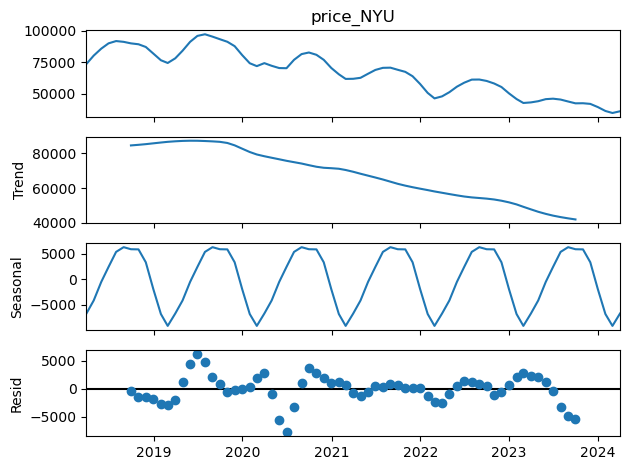

In [213]:
NYU.set_index('Date', inplace=True)

# Ensure the index has a frequency
NYU = NYU.asfreq('M')

# Print the DataFrame to confirm structure and frequency
print(NYU)
print(NYU.index)

# Assign the time series data to price_NYU
price_NYU = NYU['price_NYU']

# Perform seasonal decomposition with specified period
decompose_results = seasonal_decompose(price_NYU, model='additive', period=12)

# Plot the decomposition results
decompose_results.plot()
plt.show()

Decompose with Multiplicative Model

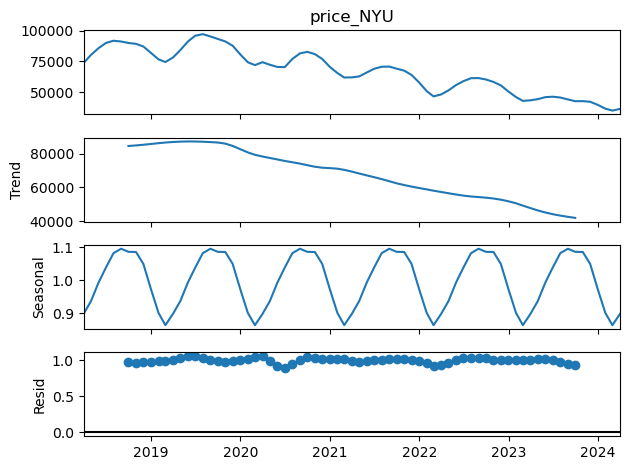

In [216]:
decompose_results = seasonal_decompose(price_NYU, model='multiplicative')
decompose_results.plot()
plt.show()

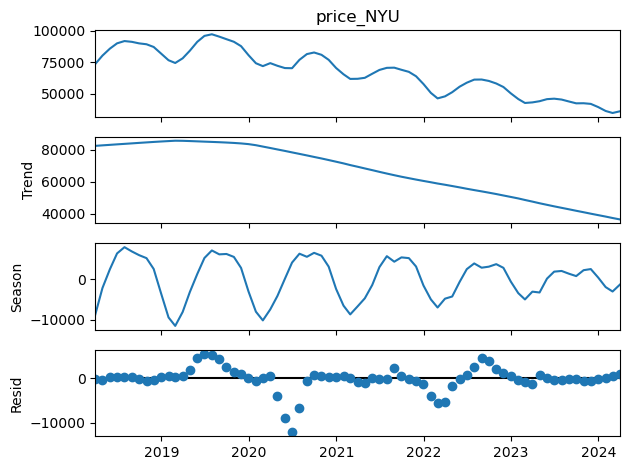

In [218]:
# Use STL decomposition, use robust version - robust to outliers
res = STL(price_NYU, robust=True).fit()
res.plot()
plt.show()

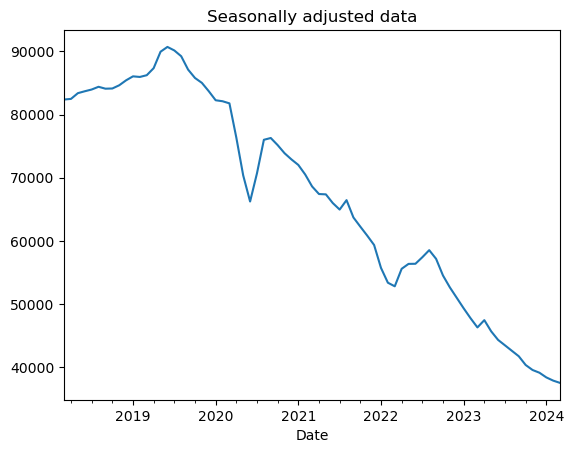

In [220]:
#Seasonally Adjust the Dataset
(price_NYU - res.seasonal).plot()
plt.title("Seasonally adjusted data")
plt.show()

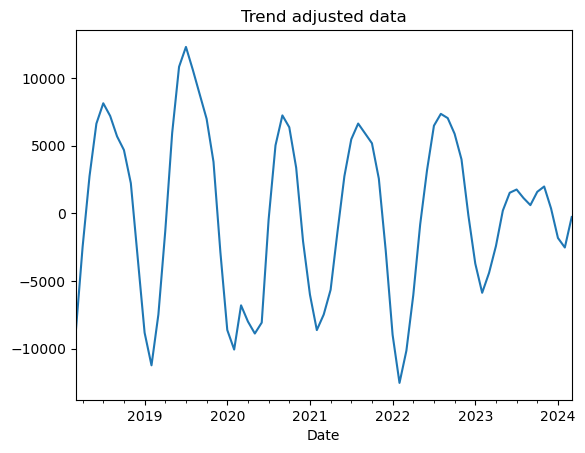

In [222]:
#Trend Adjust the Datase
(price_NYU - res.trend).plot()
plt.title("Trend adjusted data")
plt.show()

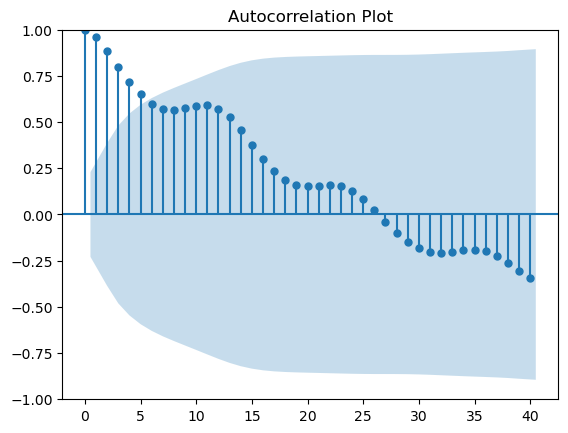

In [227]:
#ACF Plot
p = plot_acf(price_NYU, lags=40, title='Autocorrelation Plot')

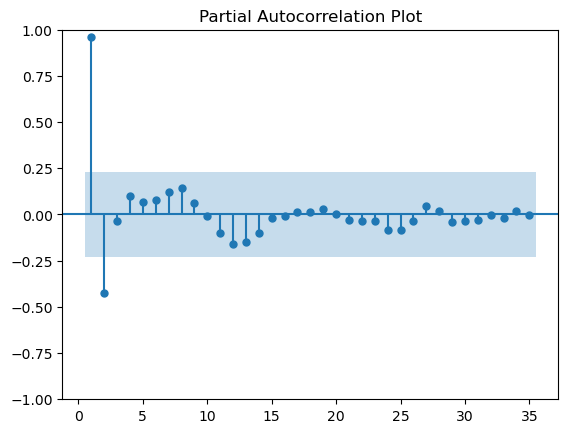

In [232]:
#PACF Plot
max_lags = int(len(price_NYU) / 2) - 1
p = plot_pacf(price_NYU, lags=max_lags, title='Partial Autocorrelation Plot', zero=False)
plt.show()

In [239]:
#Stationarity Data - Taking a Difference
differenced_data = (price_NYU-price_NYU.shift()).iloc[1:]

<Axes: xlabel='Date'>

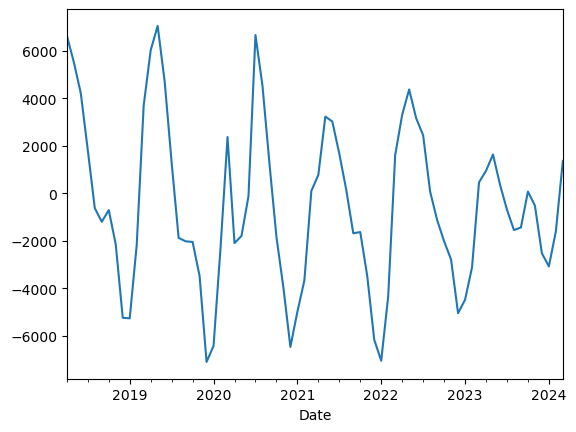

In [243]:
differenced_data.plot()

In [246]:
adf_test(differenced_data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.718109
p-value                         0.070957
#Lags Used                     10.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [249]:
ad_fuller_results = adfuller(differenced_data)
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

stationarity from ad_fuller test: False


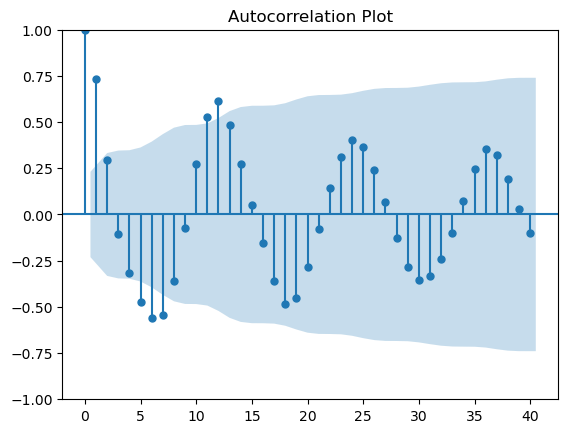

In [252]:
p = plot_acf(differenced_data, lags=40, title='Autocorrelation Plot')

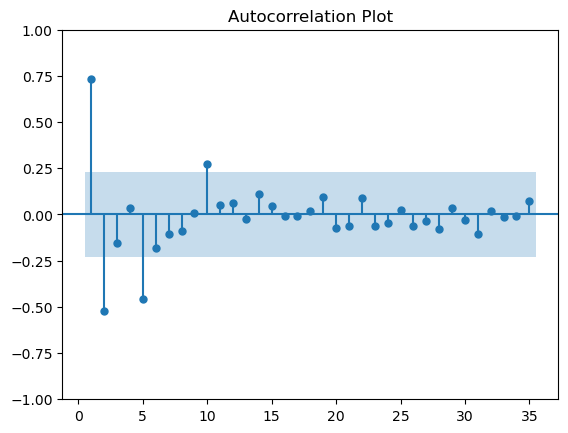

In [257]:
p = plot_pacf(differenced_data, lags=max_lags, zero=False,title='Autocorrelation Plot')

In [260]:
differenced_data2 = (differenced_data-differenced_data.shift()).iloc[1:]

<Axes: xlabel='Date'>

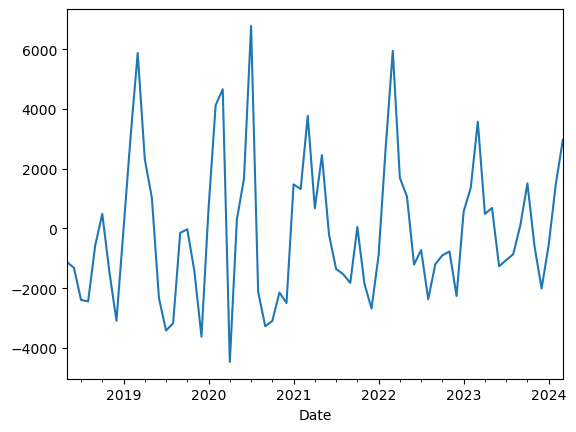

In [262]:
differenced_data2.plot()

In [264]:
adf_test(differenced_data2)

Results of Dickey-Fuller Test:
Test Statistic                 -5.382345
p-value                         0.000004
#Lags Used                     10.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


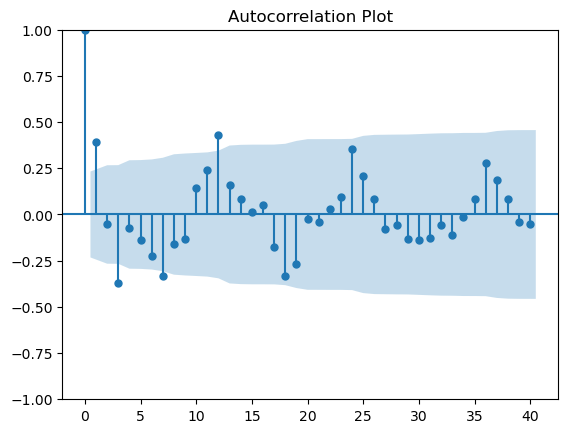

In [266]:
p = plot_acf(differenced_data2, lags=40, title='Autocorrelation Plot')

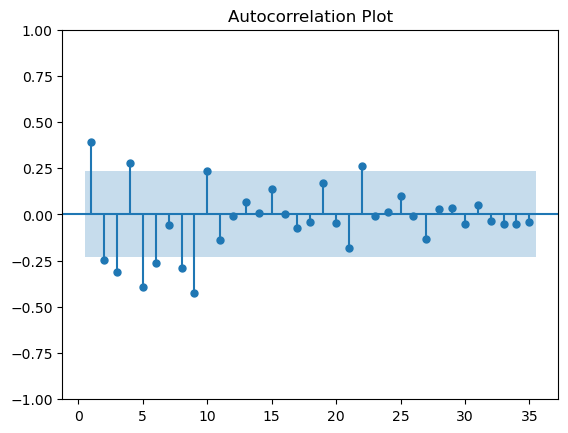

In [268]:
p = plot_pacf(differenced_data2, lags=max_lags, zero=False,title='Autocorrelation Plot')